In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# OPTIONAL: Download images for colab
import requests

def download(url, fn):
    r = requests.get(url)
    if r.status_code == 200:
        open(fn, 'wb').write(r.content)
        print("{} downloaded: {:.2f} KB".format(fn, len(r.content)/1024.))
    else:
        print("url not found:", url)

# download the matlab matrices
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/flower.mat', 'flower.mat')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/dog.mat', 'dog.mat')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/pedestrian.mat', 'pedestrian.mat')


# download corresponding jpeg images
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/flower.jpg', 'flower.jpg')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/dog.jpg', 'dog.jpg')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/pedestrian.png', 'pedestrian.png')

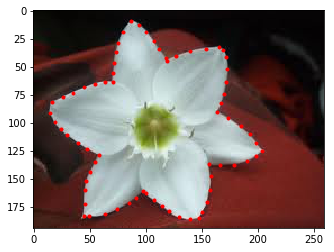

In [54]:
# PART A
flower = scipy.io.loadmat('./flower.mat')
dog = scipy.io.loadmat('./dog.mat')
pedestrian = scipy.io.loadmat('./pedestrian.mat')

def load_data(fn):
    if fn == 'flower':
        x = flower['x']
        y = flower['y']
        im = plt.imread('./flower.jpg')

    elif fn == 'dog':
        x = dog['x']
        y = dog['y']
        im = plt.imread('./dog.jpg')

    elif fn == 'pedestrian':
        x = pedestrian['x']
        y = pedestrian['y']
        im = plt.imread('./pedestrian.png')
    return x-1, y-1, im


x, y, im = load_data('flower')
# x, y, im = load_data('dog')
# x, y, im = load_data('pedestrian')

plt.imshow(im)
plt.plot(x, y, 'r.')

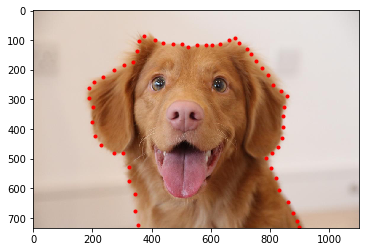

In [81]:
x, y, im = load_data('dog')
# x, y, im = load_data('pedestrian')

plt.imshow(im)
plt.plot(x, y, 'r.')

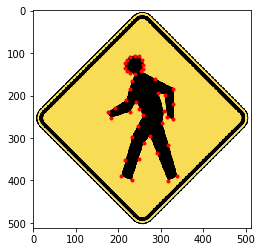

In [79]:
# x, y, im = load_data('dog')
x, y, im = load_data('pedestrian')

plt.imshow(im)
plt.plot(x, y, 'r.')

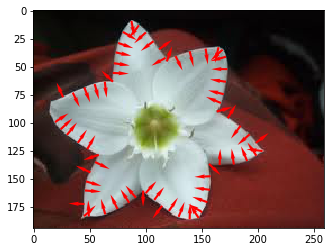

In [55]:
# PART B
bisector_x = []
bisector_y = []
for i in range(1, len(x)-1):
    u = [x[i+1] - x[i], y[i+1] - y[i]]
    v = [x[i-1] - x[i], y[i-1] - y[i]]

    # normalize vectors to be unit vectors
    u /= np.linalg.norm(u)
    v /= np.linalg.norm(v)
    # compute the normal direction to plot
    b = [u[0][0]+v[0][0] , u[1][0]+v[1][0]]
    b /= np.linalg.norm(b)
    
    bisector_x.append(b[0])
    bisector_y.append(-b[1]) # *-1 for display alignment


plt.figure()
plt.imshow(im)
plt.quiver(x[1:-1], y[1:-1], bisector_x, bisector_y, headwidth=2, color='r')
plt.show()

In [19]:
import math

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

p:  [0.019308361636521606, 1.090599118398589e-75]


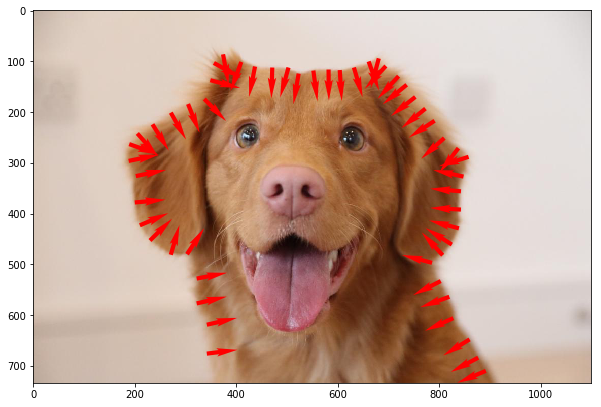

In [82]:
# PART C

# calculate marginal probabilities
p = [0.5, 0.5]

for i in range(1, len(x) - 1):
    u = [x[i+1] - x[i], y[i+1] - y[i]]
    v = [x[i-1] - x[i], y[i-1] - y[i]]

    u /= np.linalg.norm(u)
    v /= np.linalg.norm(v)

    # compute the theta, might need to do +/- 2*pi accordingly
    theta = angle([u[0][0], u[1][0]],[v[0][0], v[1][0]])
    phi = [(3.14+theta)/6.28, (3.14-theta)/6.28]

    
    # update marginal probabilities with local evidence;
    p[0] = p[0] * phi[0]
    p[1] = p[1] * phi[1]

print('p: ', p)
# go through and based on the marginals, plot correct arrow direction
bisector_x = []
bisector_y = []

for i in range(1, len(x) - 1):
    u = [x[i+1] - x[i], y[i+1] - y[i]]
    v = [x[i-1] - x[i], y[i-1] - y[i]]
    d = np.cross([u[0][0], u[1][0]],[v[0][0], v[1][0]])<=0

    # normalize vectors to be unit vectors
    u /= np.linalg.norm(u)
    v /= np.linalg.norm(v)

    
    # compute the normal direction to plot
    b = [u[0][0]+v[0][0] , u[1][0]+v[1][0]]
    b /= np.linalg.norm(b)
    
    # decide whether flip the normal direction based on local evidence and marginal probability p
    if d == (p[0]>=p[1]):
        b = -1*b

    bisector_x.append(b[0])
    bisector_y.append(-b[1]) # *-1 for display alignment

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.quiver(x[1:-1], y[1:-1], bisector_x, bisector_y, headwidth=2, color='r')
plt.show()

In [62]:
b=[1,2]
print(-2*b)

[]


In [3]:
def comp(a):
    s = 1.6*(a**2) - 1.6*a + 0.9 
    s *= 0.1
    x = 0.1 + 1.6*a - 1.6*(a**2)
    x *= 0.9
    print(s/(s+x))
    print(x/(s+x))
    
comp(0.99)
comp(0.6)

0.4588938714499249
0.5411061285500751
0.10591133004926108
0.894088669950739
